In [74]:
import re
from pandas import read_csv
import seaborn as sn
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Coleta e Tratamento dos Dados

dados = read_csv('./dados.csv')

columns = list(dados.columns)[2:]

dados = dados[dados['Região'] != 'Grande Vitória (ES)']

dados['Ano'] =  dados['Mês'].apply(lambda mes: re.findall('\d{4}',mes) [0])

dados['Mês'] = dados['Mês'].apply(lambda mes: re.findall('\w+', mes)[0])

for column in columns:
    dados[column] = dados[column].apply(lambda value: value.replace(',', '.')).astype(float)
    

In [3]:
# Calculo do IPCA Mensal

IPCA = dados['Alimentação'] * (dados['Alimentação (Peso)']/ 100)

for index in range(1,9):
    IPCA = IPCA + (dados[columns[index]] * (dados[columns[index + 9]] / 100))

dados['IPCA'] = IPCA / 9

In [4]:
# Agrupando os Dados

agrupado_regiao = dados.groupby('Região')
agrupado_ano = dados.groupby('Ano')
agrupado_mes = dados.groupby('Mês')


<Axes: >

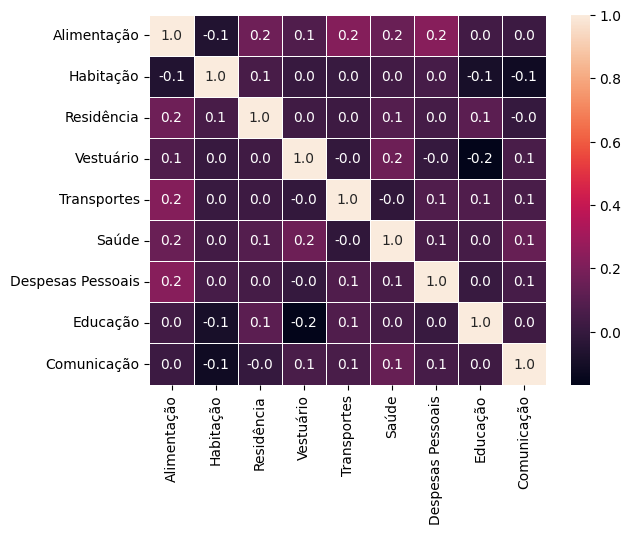

In [5]:
# Correlação dos Indices nos Meses 

correlacao = dados[columns[:9]].corr('pearson')

plot = sn.heatmap(correlacao, annot=True, fmt=".1f", linewidths=.6)

plot

<Axes: xlabel='Ano'>

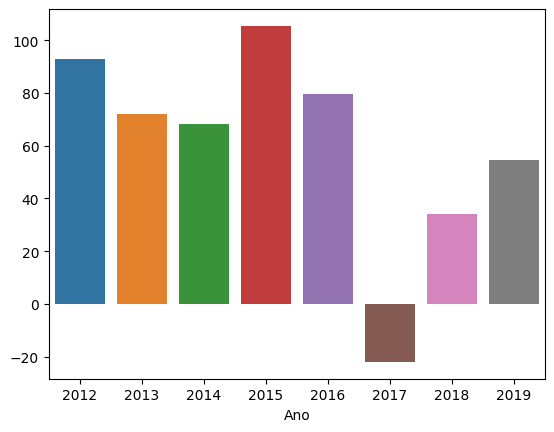

In [7]:
# Gráfico de Barras do Total do Indice de Alimentação nos Anos

values = agrupado_ano['Alimentação'].sum().values
index = agrupado_ano['Alimentação'].sum().index

sn.barplot(x=index, y=values)

<Axes: >

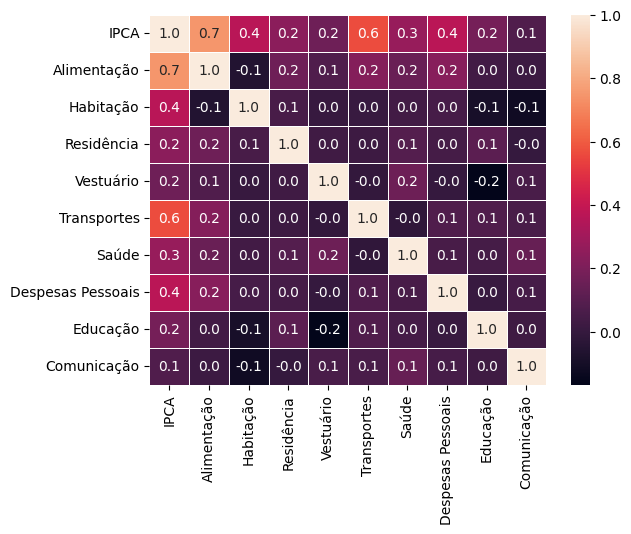

In [60]:
# Gráfico de Mapa de Calor considerando os Meses dos Anos

correlacao = dados[['IPCA', *columns[:9]]].corr('pearson')

plot = sn.heatmap(correlacao, annot=True, fmt=".1f", linewidths=.6)

plot


<Axes: >

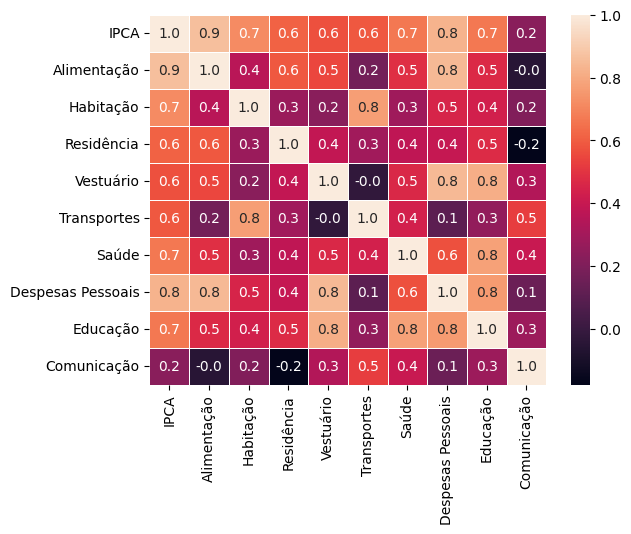

In [9]:
# Gráfico de Mapa de Calor considerando o Total dos Anos

correlacao = agrupado_ano[['IPCA', *columns[:9]]].sum().corr('pearson')

plot = sn.heatmap(correlacao, annot=True, fmt=".1f", linewidths=.6)

plot


<Axes: >

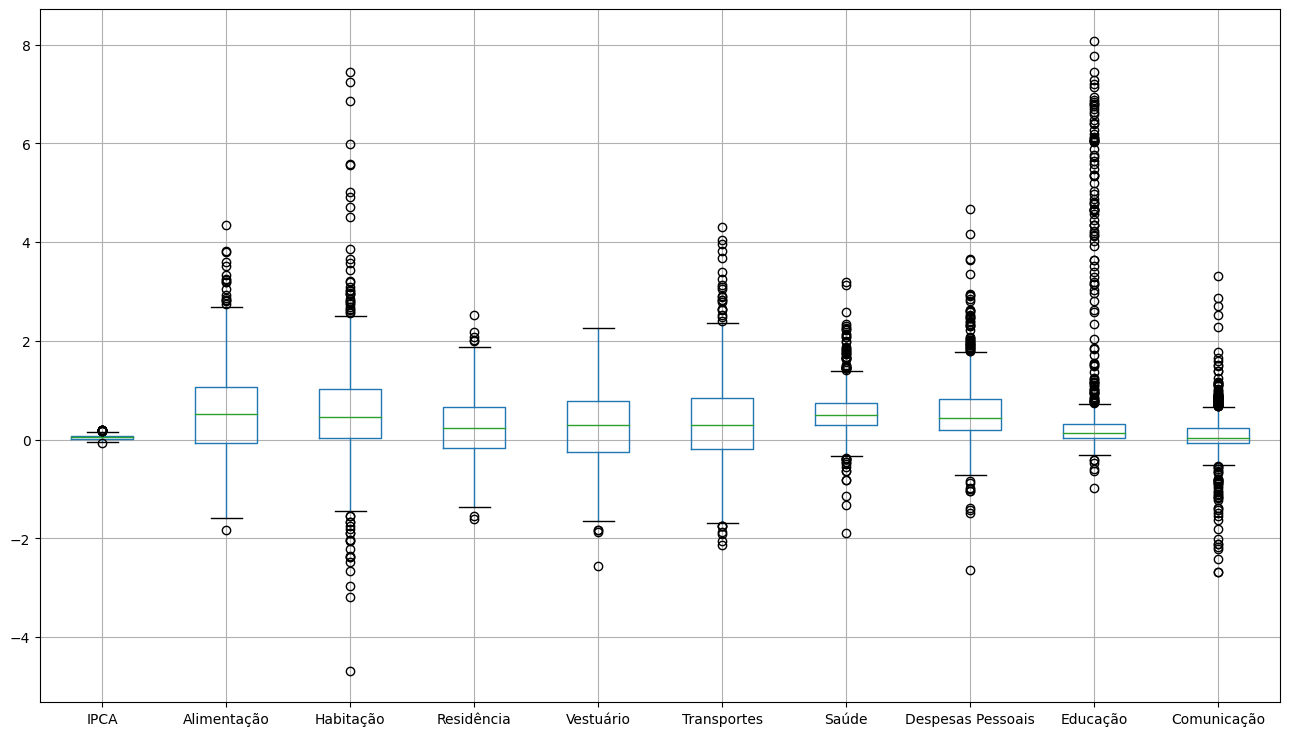

In [19]:
# Box Plot Mensal

dados[['IPCA',*columns[:9]]].boxplot(return_type='axes', figsize=(16,9))

/tmp/ipykernel_65048/2420174923.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agrupado_ano.sum()[['IPCA',*columns[:9]]].boxplot(return_type='axes', figsize=(16,9))


<Axes: >

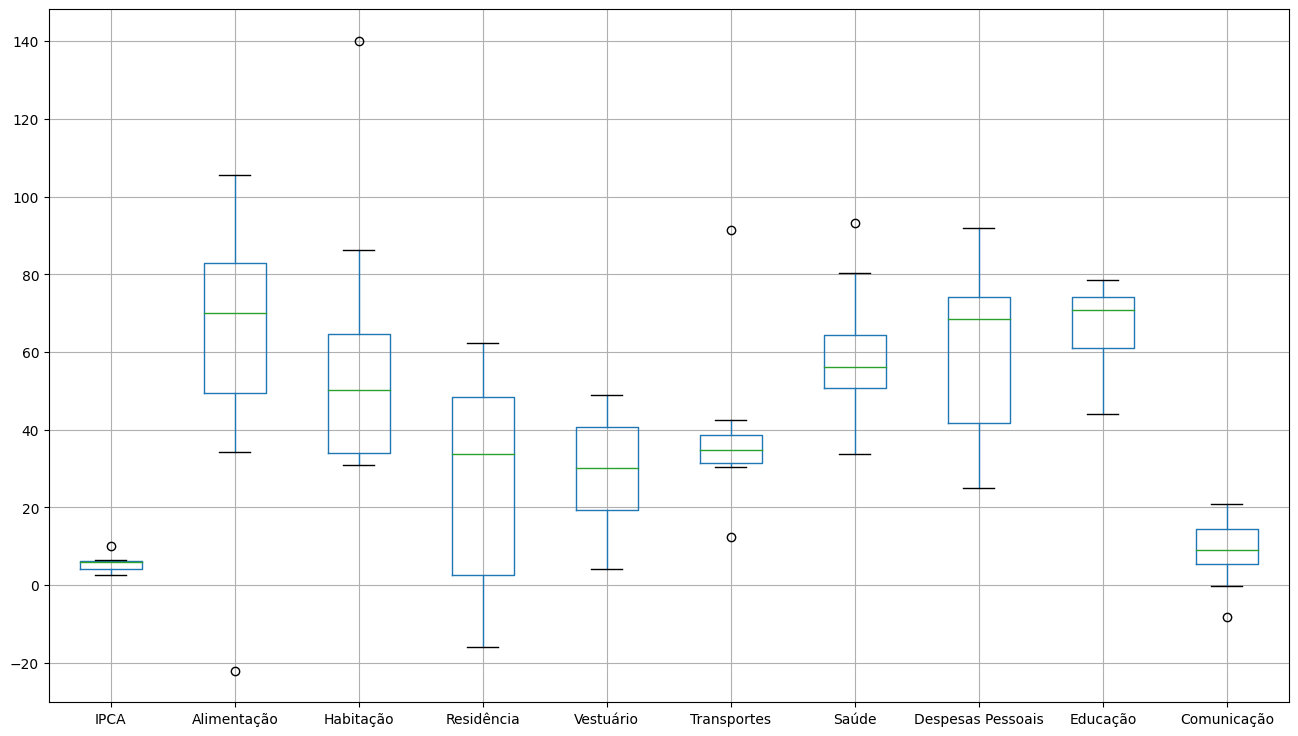

In [20]:
# Box Plot Anual

agrupado_ano.sum()[['IPCA',*columns[:9]]].boxplot(return_type='axes', figsize=(16,9))